In [1]:
cd /home/disk2/wdd/PDZ/complex/charmm36

/home/disk2/wdd/PDZ/complex/charmm36


In [3]:
from msmbuilder.dataset import dataset
from msmbuilder.cluster import KCenters
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=20)

/software/anaconda2/envs/msmb/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/software/anaconda2/envs/msmb/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
xyz = dataset("chainB_fit.xtc",topology='crystal.pdb',stride=1)

In [4]:
from msmbuilder.featurizer import DihedralFeaturizer

In [6]:
featurizer_s = DihedralFeaturizer(types=['phi', 'psi'],sincos=False)

In [7]:
diheds_s = xyz.fit_transform_with(featurizer_s, 'diheds_s/',fmt='dir-npy')

In [8]:
xyz_c = dataset("./crystal.pdb",topology='crystal.pdb',stride=1)
featurizer_c = DihedralFeaturizer(types=['phi', 'psi'],sincos=False)
diheds_c = xyz_c.fit_transform_with(featurizer_c, 'diheds_c/',fmt='dir-npy')

/software/anaconda2/envs/msmb/lib/python2.7/site-packages/mdtraj-1.8.0-py2.7-linux-x86_64.egg/mdtraj/core/trajectory.py:417: UserWarning: top= kwarg ignored since file contains topology information
  warnings.warn('top= kwarg ignored since file contains topology information')


In [9]:
crystral_dihed=diheds_c[0][0]/3.14*180

In [25]:
def singleSD(nList,refList):
    length=len(nList)
    sumVar=0.0
    for i in range(length):
        sub=nList[i]-refList[i]
        if np.abs(sub)>180:
            sub=360-np.abs(sub)
        sumVar+=sub**2
    return ((float(sumVar)/float((length)))**0.5)

In [26]:
wf=open('rmsd_dihed_astime.cs','w')
for j in range(len(diheds_s[0])):
    rmsd=singleSD(diheds_s[0][j]/3.14*180,crystral_dihed)
    wf.write(str(j)+'    '+str(rmsd)+'\n')
wf.close()

In [18]:
diheds_s[0][1066]/3.14*180

array([ -87.95825958, -161.84442139, -141.13569641,  -96.23635101,
       -108.44166565, -172.94238281,  171.81871033,  128.89372253,
        124.20461273], dtype=float32)

In [19]:
diheds_s[0][1070]/3.14*180

array([ -66.08190155, -116.97480774, -118.61222076,  -93.16132355,
       -128.53196716,  135.35375977,  139.0592041 ,  124.88666534,
        136.34594727], dtype=float32)

In [20]:
crystral_dihed

array([ -60.02958679, -139.56974792, -129.19688416,  -89.59128571,
       -128.53622437,  148.59483337,  129.79824829,  135.33282471,
        132.82144165], dtype=float32)

In [27]:
cd /home/disk2/wdd/PDZ/complex/amber03ws/

/home/disk2/wdd/PDZ/complex/amber03ws


In [33]:
xyz = dataset("chainB_fit.xtc",topology='cry.pdb',stride=1)

In [34]:
featurizer_s = DihedralFeaturizer(types=['phi', 'psi'],sincos=False)

In [36]:
diheds_s = xyz.fit_transform_with(featurizer_s, 'diheds_s/',fmt='dir-npy')

In [31]:
xyz_c = dataset("./crystal.pdb",topology='crystal.pdb',stride=1)
featurizer_c = DihedralFeaturizer(types=['phi', 'psi'],sincos=False)
diheds_c = xyz_c.fit_transform_with(featurizer_c, 'diheds_c/',fmt='dir-npy')

In [37]:
wf=open('rmsd_dihed_astime.cs','w')
for j in range(len(diheds_s[0])):
    rmsd=singleSD(diheds_s[0][j]/3.14*180,crystral_dihed)
    wf.write(str(j)+'    '+str(rmsd)+'\n')
wf.close()

In [4]:
import MDAnalysis as mda
from MDAnalysis.analysis import contacts
t_ref=mda.Universe('begin.pdb',top='begin.pdb')
group1=t_ref.select_atoms('segid A and (name C* or name N* or name O* or name S*)')
trjname="c_fit.xtc"
u=mda.Universe("begin.pdb",trjname)
filename='Q_heavyatoms.cs'
wf=open(filename,'w')
sel2='segid B and (name C* or name N* or name O* or name S*)'
group2=t_ref.select_atoms(sel2)
nc=contacts.Contacts(u,selection=("segid A and (name C* or name N* or name O* or name S*)",sel2),refgroup=(group1,group2),method='soft_cut')
nc.run()
bound=nc.timeseries[:,1]
for b in bound:
     wf.write(str(b)+'\n')
wf.close()

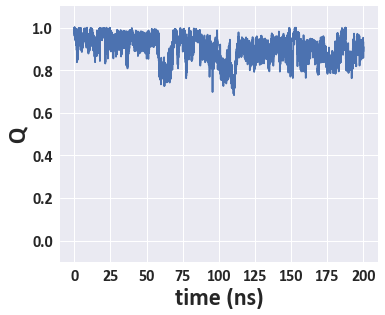

In [11]:
import seaborn as sns
sns.set(color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/disk2/wdd/msm/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)
time_step = 0.01
fig, ax = plt.subplots(figsize=(5.7,4.7))
data = np.loadtxt('Q_heavyatoms.cs')
#print len(data)
time = np.arange(len(data))*time_step
ax.plot(time,data)
#ax.set_ylabel('rmsd ($^\circ$)',fontproperties=font_prop)
ax.set_ylabel('Q',fontproperties=font_prop)
ax.set_xlabel('time (ns)',fontproperties=font_prop)
plt.ylim(-0.1,1.1)
#plt.xlim(0,1000)
#ax.set_xticks(np.linspace(0,1200,7))
#ax.set_xticklabels([0,200,400,600,800,1000])
#leg=plt.legend(loc='center left', labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.3,bbox_to_anchor=(1,0.5))
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.savefig("Q.png",dpi=600,bbox_inches='tight')
plt.show()

In [4]:
data = np.loadtxt('Q_heavyatoms.cs')

In [10]:
num=0
for i in range(len(data)):
    if data[i]>=0.87:
        num+=1
print num/20001.0

0.742162891855


In [11]:
mfpt=np.loadtxt('crystal_macro_trajs_mfpt.dat')

In [13]:
newQ=[]
for j in range(len(mfpt)):
    if mfpt[j]==0.0:
        newQ.append(data[j])

In [17]:
np.mean(newQ)

0.9050786896516646